# Hyperparameters!

In **machine learning**, the model learns by itself. That's the whole point. However, you can control *how the model learns* by making changes to the model! Adjusting the structure of the model to make it *learn better* is called **hyperparameter tuning**. This technique is SUPER IMPORTANT to combat **overfitting** and it one of the main tools in the data scientist's arsenal.

**Hyperparameters** are characteristics of the model structure. We've already seen **hyperparameters**! When we changed the `kernel` of the Support Vector Machine to make it draw circles, we were tuning a **hyperparameter**! We changed the structure of the model to make it draw circles instead of straight lines.

Each model type has different **hyperparameters**, and each **hyperparameter** does different things. We are going to address a few of the big ideas behind them and then I'll show you how to find the **hyperparameters** for any model (by Googling them) and then we will look at two convenient ways to **tune hyperparameters** in a semi-automated way.

# Regularization

A lot of the time (*but not all the time*), **hyperparameters** are **tuned** with the goal of **regularizing** the model. In math, **regularization** means taking something complicated and making it simpler. Most of the super-important **hyperparameters** that we're going to talk about control the complexity of the model. The mathematical idea of **elegance** is that we should use the simplest solution that solves the problem, and that's what we're doing with **regularization**, too. We are looking for the simplest model that makes the best predictions. 

How we can simplify the model depends on the type of model we are using, but remember that most of the **hyperparameters** we're using are designed to make the model simpler, less complicated.

# Important Hyperparameters

## L2 and L1 Regularization

These two types of **regularization** are common across a bunch of algorithms, from linear regression to gradient boosting and even neural networks. They are everywhere. Luckily, they're also pretty simple. Think about the coefficients of a linear model:

$$y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n$$

If a coefficient is zero, then it eliminates one of the terms and the model is simpler, right? **L1** and **L2 regularization** try to push the coefficients toward zero. They do that by adding a penalty to the model while it is learning. 

In [71]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

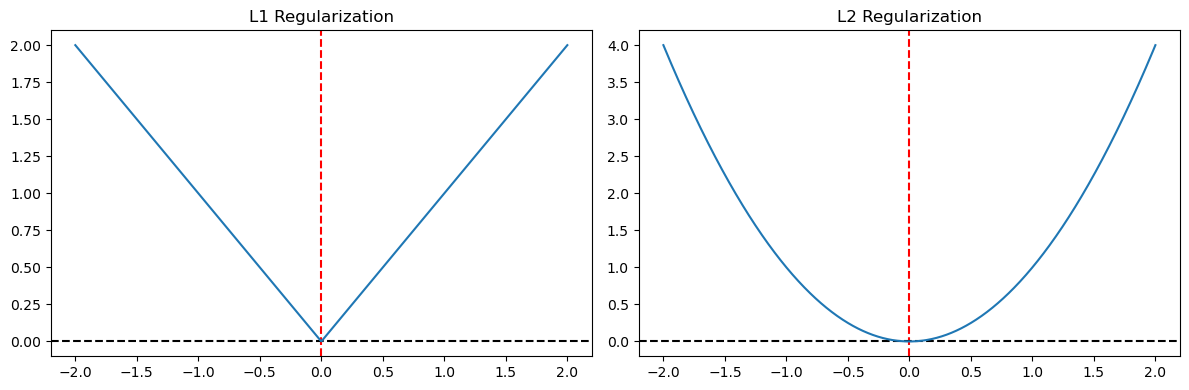

In [8]:
# l1 and l2 regularization
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
x = np.linspace(-2, 2, 1000)
ax[0].axvline(0, linestyle='dashed', color='red')
ax[0].axhline(0, linestyle='dashed', color='black')
ax[0].plot(x, np.abs(x))
ax[0].set_title('L1 Regularization')
ax[1].axvline(0, linestyle='dashed', color='red')
ax[1].axhline(0, linestyle='dashed', color='black')
ax[1].plot(x, x**2)
ax[1].set_title('L2 Regularization')
fig.tight_layout();

**L1 Regularization** pushes the coefficient toward zero rather strongly, no matter how small the coefficient gets, so the model really has to have a good reason for the coefficient to be anything other than zero. This makes **L1 Regularization** useful for **feature selection**, deciding which features are actually important enough to be kept in the model. If you have a lot of features, you can use **feature selection** to keep *uninformative* features from leading your model astray. We're going to talk more about **feature selection** next week.

**L2 Regularization** pushes the coefficient more strongly toward zero when the coefficient is farther away from zero, but when the coefficient is near zero it doesn't push much at all. Thus, **L2 Regularization** rarely pushes coefficients *all the way* to zero. But it does a good job of keeping the coefficients from getting very large.

You can think of it like this: **L2 Regularization** makes sure that no feature has an outsized impact, while **L1 Regularization** makes some features have no impact at all.

### Lasso and Ridge Regression

**Linear Regression** with **L2 Regularization** is called **Ridge Regression**.

**Linear Regression** with **L1 Regularization** is called **Lasso Regression**.

**Linear Regression** with both forms of **regularization** is called **Elastic Net Regression**.

All three are available from Sci-kit Learn.

In [65]:
# import
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [63]:
# fake data
x1 = np.random.normal(size=1000)
x2 = np.random.normal(size=1000)
x3 = np.random.normal(size=1000)
y = (3 * (x1**2)) + (-4*x1) + (-2 * (x2**2)) + (7*x2) + (5*x1*x2) + (0.5*x1*x3) + 6
y = y + np.random.normal(scale=10, size=y.shape)

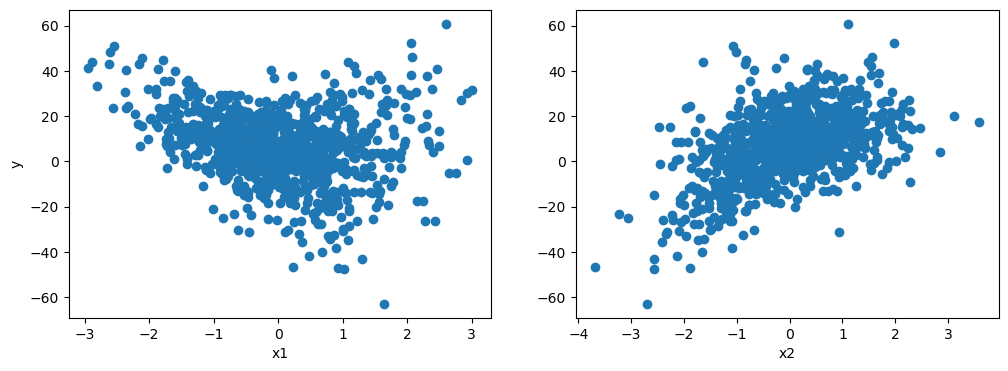

In [64]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].scatter(x1, y)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[1].scatter(x2, y)
ax[1].set_xlabel('x2');

In [78]:
# standard linear regression
poly_feats = PolynomialFeatures(degree=3)
X = pd.DataFrame([x1, x2, x3], index=['x1', 'x2', 'x3']).T
X = poly_feats.fit_transform(X)
X = pd.DataFrame(X, columns=poly_feats.get_feature_names_out(['x1', 'x2', 'x3']))

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = sm.OLS(y_train, X_train)
lr_results = lr.fit()

True Data Generating Function:

$$y=3x_1^2 -4x_1 -2x_2^2 +7x_2 + 5x_1x_2 + 0.5x_1x_3 + 6 + N(0, 10)$$

In [79]:
print(lr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     55.56
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.01e-130
Time:                        10:21:13   Log-Likelihood:                -2979.9
No. Observations:                 800   AIC:                             6000.
Df Residuals:                     780   BIC:                             6094.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              5.9955      0.591     10.139      0.0

In [81]:
# regularized models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elasticnet = ElasticNet(alpha=1.0)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train);

In [86]:
# look at the effect of regularization on coefficients
coef_df = pd.DataFrame(index=poly_feats.get_feature_names_out(['x1', 'x2', 'x3']))
coef_df['ridge'] = ridge.coef_
coef_df['lasso'] = lasso.coef_
coef_df['elasticnet'] = elasticnet.coef_
coef_df

,ridge,lasso,elasticnet
1,0.000000,0.000000,0.000000
x1,-3.755664,-1.410294,-0.874793
x2,7.079302,4.953936,2.487342
x3,-1.267260,0.000000,-0.000000
x1^2,3.231759,2.786618,2.531153
x1 x2,5.481614,4.574424,3.305485
x1 x3,0.107789,0.000000,0.000000
x2^2,-1.971940,-1.407243,-1.384354
x2 x3,0.480972,0.000000,0.000000
x3^2,-0.056300,0.000000,0.000000


## Support Vector Regularization

**Support Vector Machines** have two important regularization hyperparameters: **Gamma ($\gamma$)** and **C**. Studies have shown that these two hyperparameters are the most important hyperparameters, regardless of the kernel. They also affect one another, so it's important to get the balance right.

### Gamma ($\gamma$)

A support vector machine draws lines to separate different classes of observations. That's how support vector machines work. The model tries to draw the lines so as to keep the classes as far apart as possible. The **gamma** parameter controls *which* points contribute *how much information* to the lines. Higher **gamma** means that points farther away from the line are more important, and low **gamma** means only the points close to the line are important. 

To visualize it, you can think like this:
A few weeks ago, we used an RBF kernel to draw a circle to separate classes, remember? A high value of gamma means that circle has to strictly be a circle. A low value of **gamma** means that circle can have lumps doesn't have to be exactly circular. Let's see that with an example.

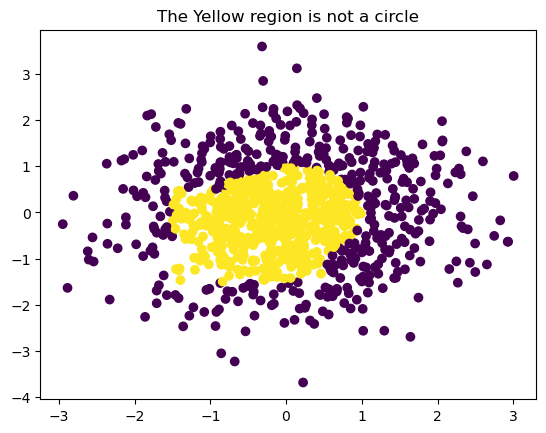

In [102]:
class_y = [1 if (p**2 + q**2 < 1) or ((p<0.5) and (q<0.5) and (p>-1.5) and (q>-1.5)) else 0 for p, q in zip(x1, x2)]
cmap = {0: 'red', 1:'blue'}
plt.scatter(x1, x2, c=class_y)
plt.title('The Yellow region is not a circle');

In [104]:
# import 
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [132]:
# classification train and test
class_y_train = [class_y[i] for i in X_train.index]
class_y_test = [class_y[i] for i in X_test.index]

# fit SVC with several values of gamma
svcs = {}
for gamma in np.power(10., np.arange(-1, 3)):
    svc = SVC(kernel='rbf', gamma=gamma)
    svc.fit(X_train[['x1', 'x2']], class_y_train)
    svcs[gamma] = svc

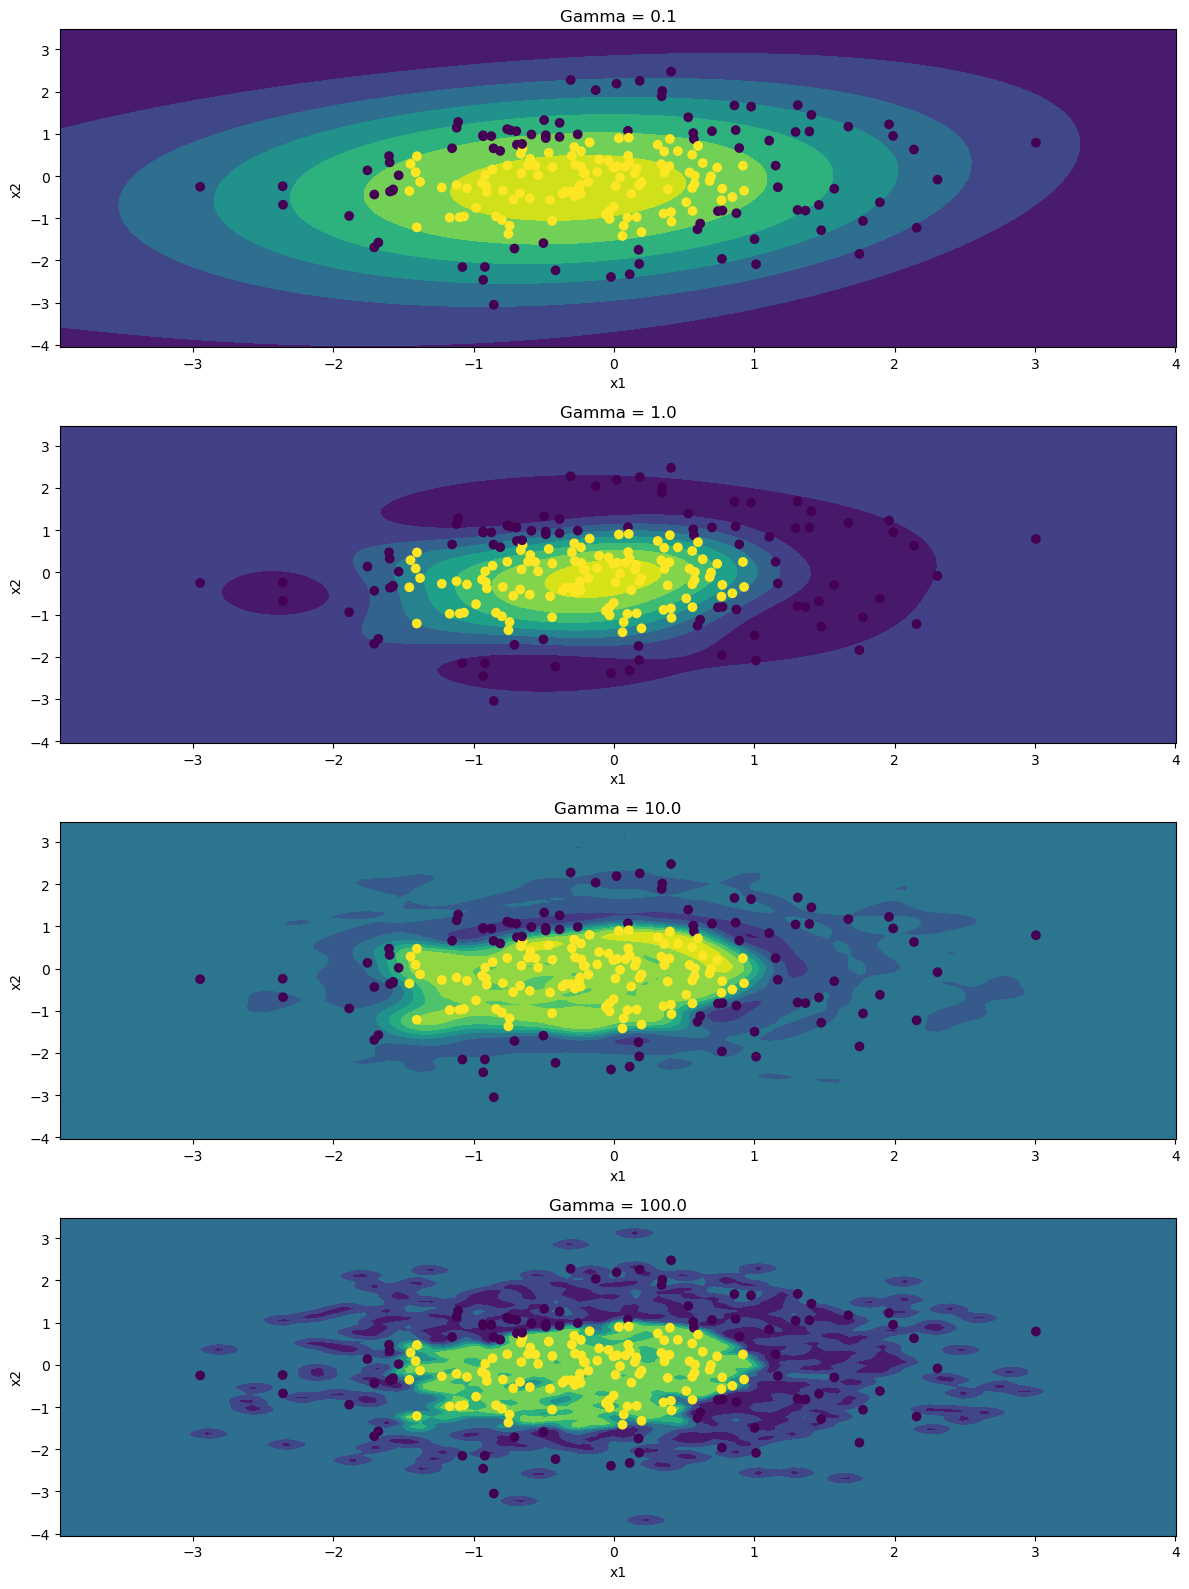

In [133]:
# plot decision boundaries
fig, ax = plt.subplots(nrows=len(svcs.keys()), figsize=(12, 4*len(svcs.keys())))
for i, k in enumerate(svcs.keys()):
    DecisionBoundaryDisplay.from_estimator(svcs[k], X_test[['x1', 'x2']], ax=ax[i])
    ax[i].scatter(X_test['x1'], X_test['x2'], c=class_y_test)
    ax[i].set_title(f'Gamma = {k}')
fig.tight_layout();

### C

Most of the time in the real world, classes cannot be neatly separated by a line because there is overlap between them. The **C** hyperparameter controls how much the model cares about that overlap. It's hard to explain in words, but makes sense when you see it. So let's see it!

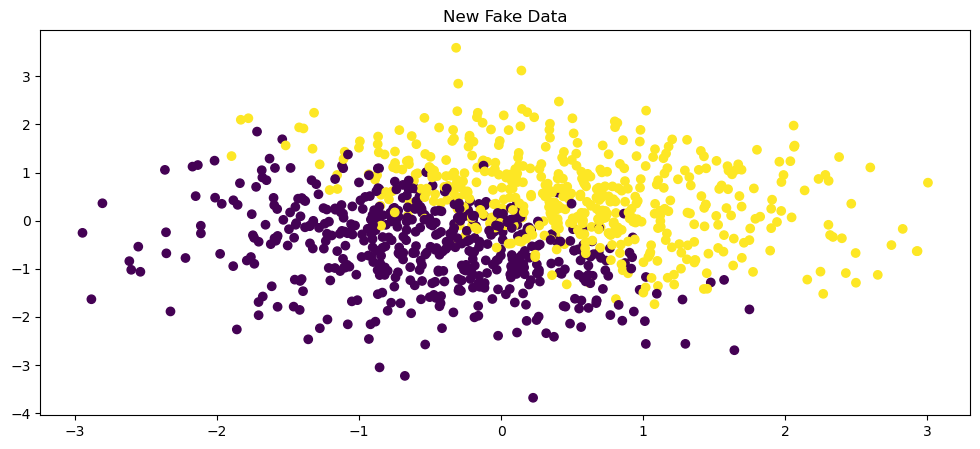

In [145]:
# fake data with overlap
class_y = [1 if (p + q + np.random.normal(scale=0.5) > 0) else 0 for p, q in zip(x1,x2)]
fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(x1, x2, c=class_y)
ax.set_title('New Fake Data');

In [170]:
# classification train and test
class_y_train = [class_y[i] for i in X_train.index]
class_y_test = [class_y[i] for i in X_test.index]

# fit SVC with several values of gamma
svcs = {}
for C in np.power(10., np.arange(-5, 5, 2)):
    svc = SVC(kernel='poly', degree=3, C=C)
    svc.fit(X_train[['x1', 'x2']], class_y_train)
    svcs[C] = svc

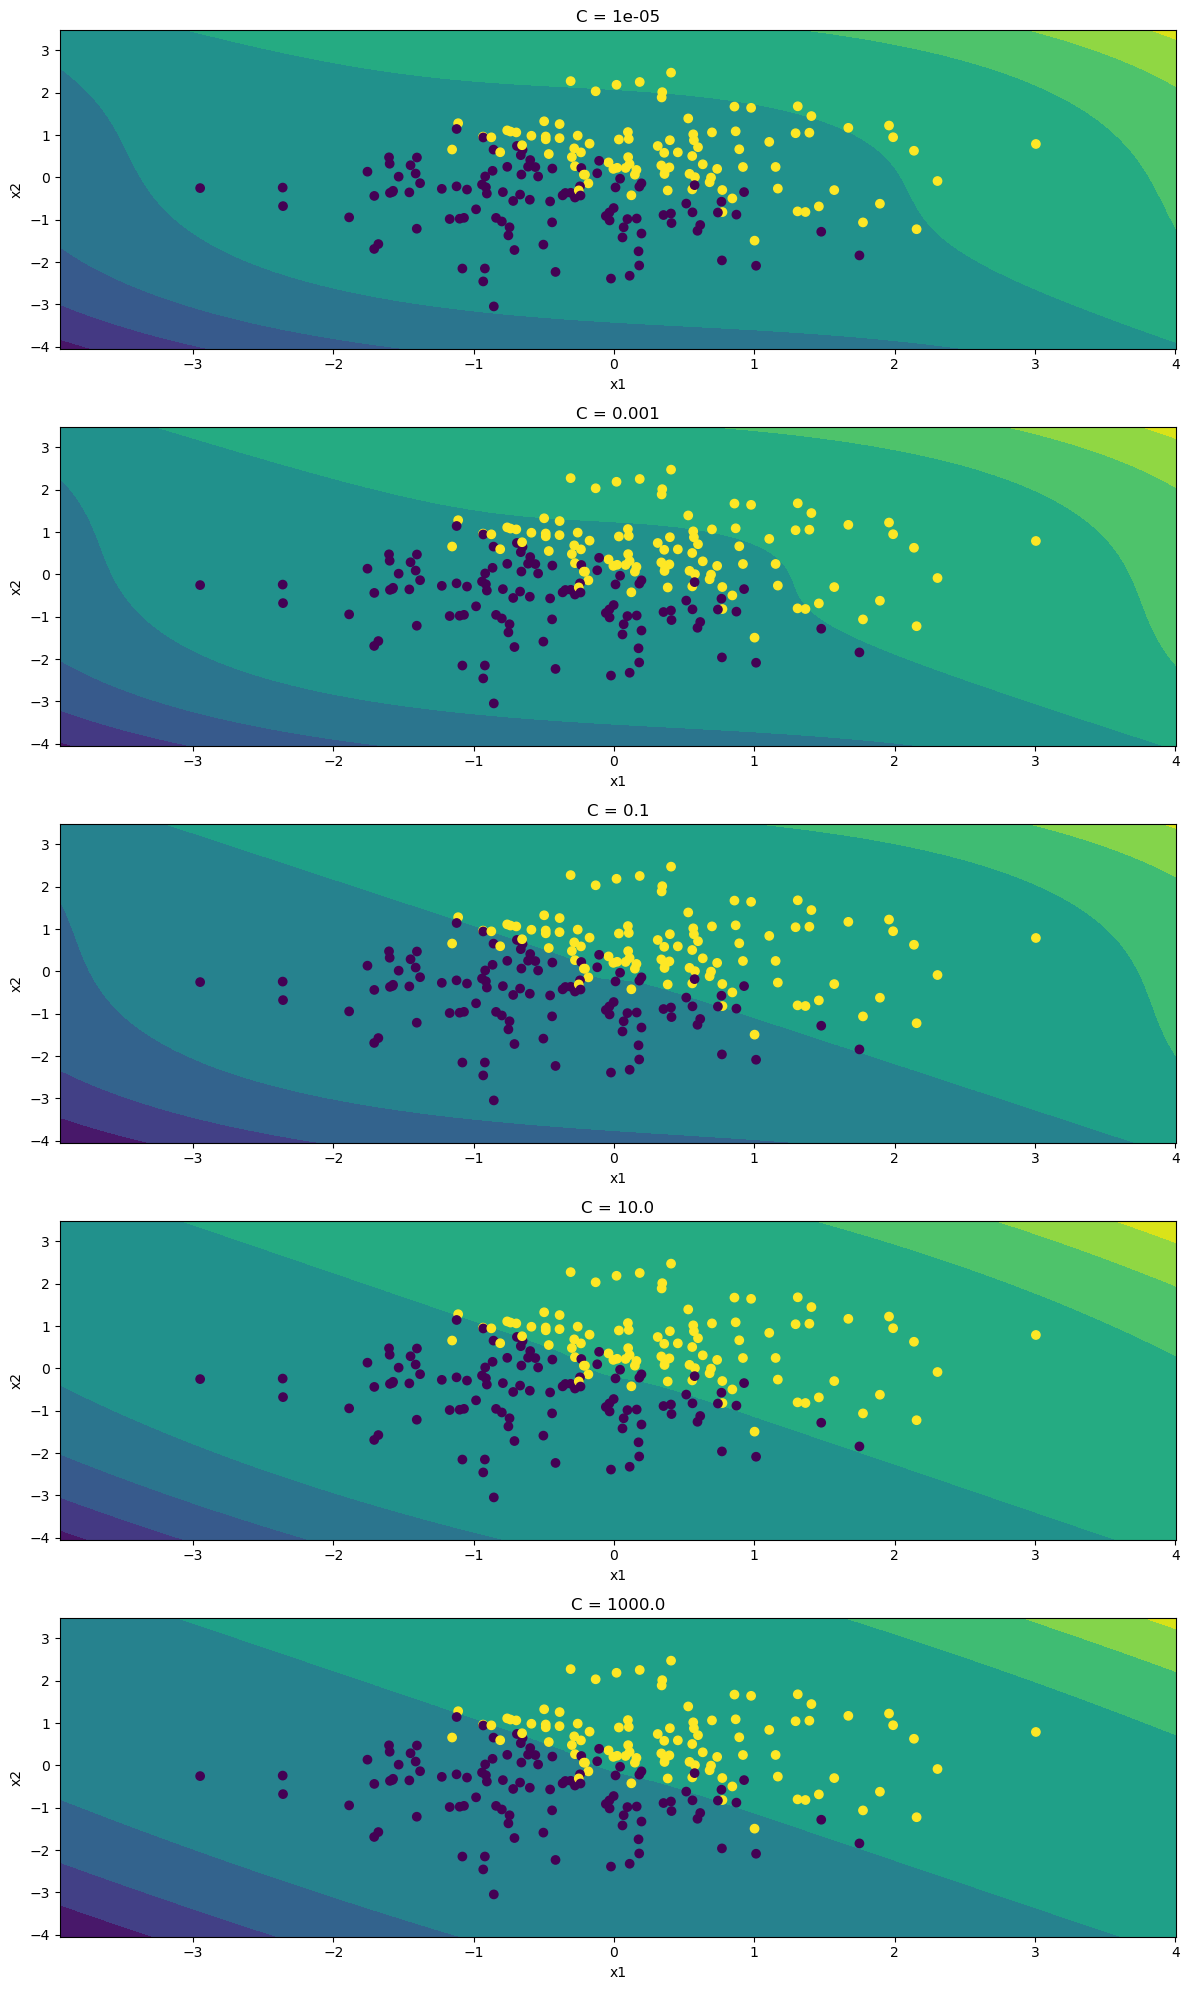

In [171]:
# plot decision boundaries
fig, ax = plt.subplots(nrows=len(svcs.keys()), figsize=(12, 4*len(svcs.keys())))
for i, k in enumerate(svcs.keys()):
    DecisionBoundaryDisplay.from_estimator(svcs[k], X_test[['x1', 'x2']], ax=ax[i])
    ax[i].scatter(X_test['x1'], X_test['x2'], c=class_y_test)
    ax[i].set_title(f'C = {k}')
fig.tight_layout();

## Random Forest Regularization

The two *most important*, or *most often important*, **hyperparameters** for Random Forest models are **min_samples_leaf** and **max_features**. That's what they're called in the Sci-kit Learn implementation of Random Forests.

### min_samples_leaf

This controls the number of observations in each leaf. The leaf nodes are the final nodes, the very end of the decision tree. By default, decision trees will make leaves with a single observation in them. That's a big sign of overfitting, but it's one we can easily control with the **min_samples_leaf** parameter which forces the trees to accept *imperfect* leaf nodes.

In [183]:
# import from sklearn
from sklearn.ensemble import RandomForestClassifier

# fit Random Forest with several values of min_samples_leaf
rfs = {}
for min_samples_leaf in np.arange(1, 60, 10):
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train[['x1', 'x2']], class_y_train)
    rfs[min_samples_leaf] = rf

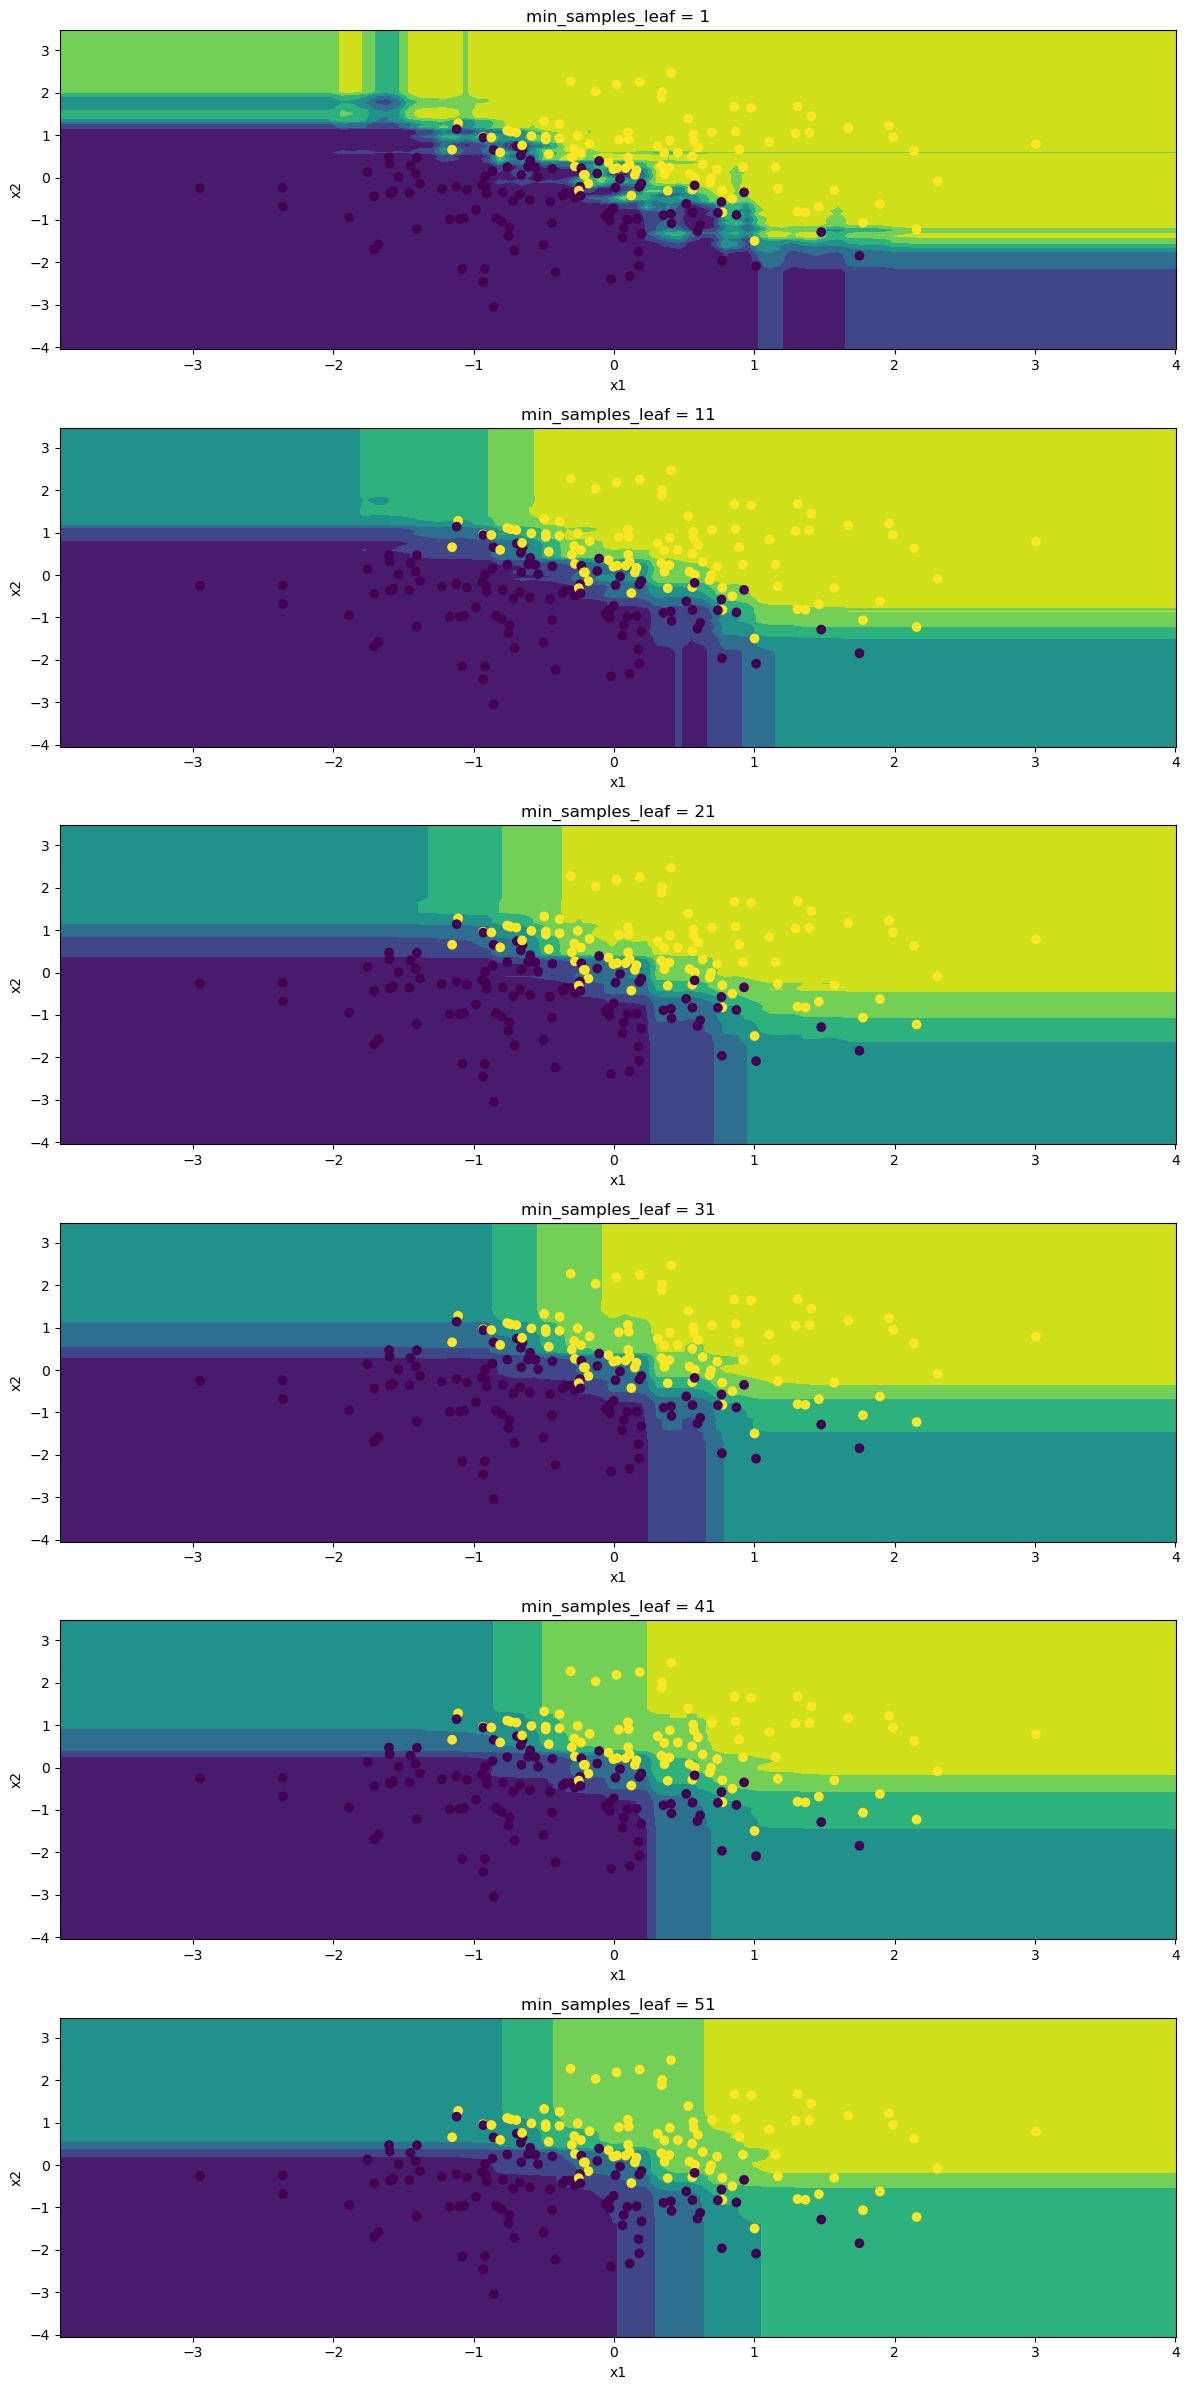

In [184]:
# plot decision boundaries
fig, ax = plt.subplots(nrows=len(rfs.keys()), figsize=(12, 4*len(rfs.keys())))
for i, k in enumerate(rfs.keys()):
    DecisionBoundaryDisplay.from_estimator(rfs[k], X_test[['x1', 'x2']], ax=ax[i])
    ax[i].scatter(X_test['x1'], X_test['x2'], c=class_y_test)
    ax[i].set_title(f'min_samples_leaf = {k}')
fig.tight_layout();

### max_features

When the Random Forest model is looking for the best split, it considers features one by one. By default, it considers all of the features and then picks the best split. The **max_features** parameter restricts the model to only trying a certain number of features and then choosing the best split from that subset. Like **min_samples_split**, this forces the decision trees to be *imperfect*, which reduces overfitting.

In [214]:
# load diabetes data
diabetes_data = pd.read_csv('transformed_diabetes_data.csv')
diabetes_data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,age_buckets_thirties,age_buckets_40plus,outcome
0,0.763721,0.852119,-0.032998,0.671091,0.416780,0.269082,0.761343,1.362563,0,1,1.0
1,-0.708481,-1.207994,-0.527280,0.073180,-1.296968,-0.831240,-0.141270,0.113269,1,0,0.0
2,1.148595,1.996626,-0.692041,-0.271203,0.371574,-1.455115,0.869179,0.217510,1,0,1.0
3,-0.708481,-1.077194,-0.527280,-0.590521,-0.557812,-0.572858,-1.296906,-1.494139,0,0,0.0
4,-1.724150,0.492416,-2.669169,0.671091,0.406599,1.441855,2.775306,0.315239,1,0,1.0


In [224]:
# train-test split
diabetes_train, diabetes_test = train_test_split(diabetes_data, test_size=0.2)

# fit Random Forest with several values of max_features
rfs = {}
for max_features in np.arange(1, 100, 2) / 100:
    rf = RandomForestClassifier(max_features=max_features)
    rf.fit(diabetes_train.drop(columns='outcome'), diabetes_train['outcome'])
    rfs[max_features] = rf

In [225]:
from sklearn.metrics import accuracy_score

In [235]:
# calculate accuracy
accs = {}
for k, v in rfs.items():
    pred = v.predict(diabetes_test.drop(columns='outcome'))
    score = accuracy_score(diabetes_test['outcome'], pred)
    accs[k] = score

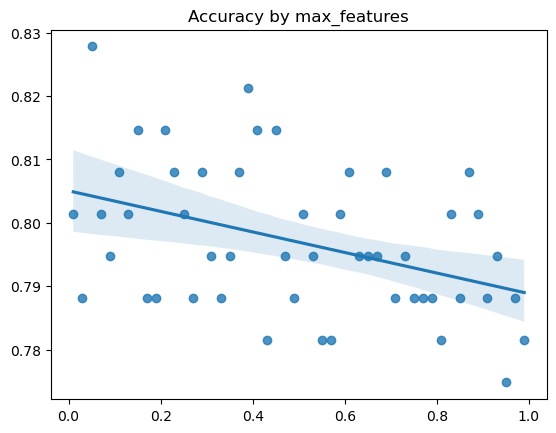

In [237]:
# get an idea of the relationship between max_features and accuracy
import seaborn as sns
sns.regplot(x=[k for k in accs.keys()], y=[v for v in accs.values()])
plt.title('Accuracy by max_features');

## Regularization for Gradient Boosting Models

**Gradient Boosting Models** have WAY TOO MANY hyperparameters to really get into. In theory, they can have just about any hyperparameter anybody can think of, because they can be made of any underlying model(s). But they're generally built of decision trees and so generally have *tree-based hyperparameters* similar to **Random Forests**, with the addition of general hyperparameters like **learning_rate** and **L2 Regularization**. 

When tuning a **gradient boosting model**, it's important to think about your data, the underlying model, and the *general intuition behind gradient boosting*. Why were gradient boosting models even invented? The idea was to take several weak models and turn them into one strong model. Most of the time, tuning the **hyperparameters** of a gradient boosting model will entail *weakening the underlying model*. When the underlying models are decision trees, that means limiting **max_depth**. 

### max_depth

The **max_depth** hyperparameter controls how many layers each underlying decision tree is allowed to have. For example, if **max_depth** is set to 1, that means each decision tree gets to make ONE split in the data. That's some hard regularization!

In [255]:
# import catboost
from catboost import CatBoostClassifier

# fit Random Forest with several values of max_features
gbms = {}
for max_depth in np.arange(1, 16, 1):
    try:
        gbm = CatBoostClassifier(max_depth=max_depth, verbose=False)
        gbm.fit(diabetes_train.drop(columns='outcome'), diabetes_train['outcome'])
        gbms[max_depth] = gbm
    except:
        continue

In [256]:
# calculate accuracy
accs = {}
for k, v in gbms.items():
    pred = v.predict(diabetes_test.drop(columns='outcome'))
    score = accuracy_score(diabetes_test['outcome'], pred)
    accs[k] = score

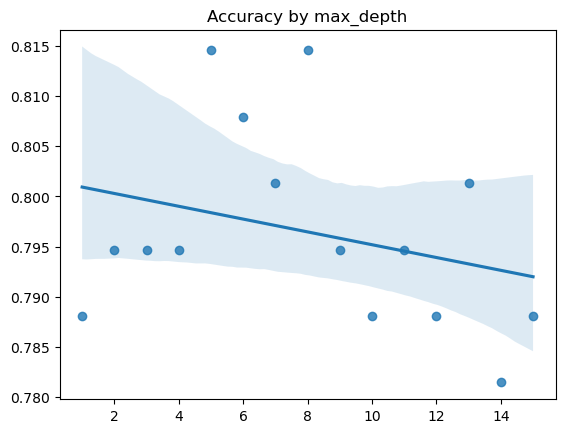

In [257]:
# plot the accuracies
sns.regplot(x=[k for k in accs.keys()], y=[v for v in accs.values()])
plt.title('Accuracy by max_depth');